In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [3]:
data= pd.read_csv("mushrooms.csv")

In [4]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [10]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [12]:
data['class'].unique()

array(['p', 'e'], dtype=object)

In [13]:
data.shape

(8124, 23)

<Axes: xlabel='class', ylabel='Count'>

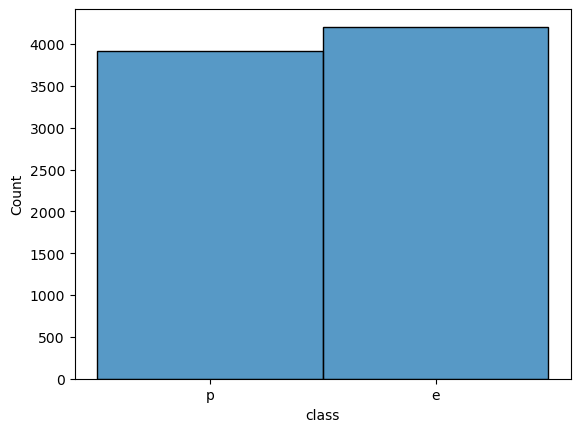

In [15]:
sbn.histplot(data['class'])

In [16]:
X = data.drop(['class'],axis=1)
y = data['class']

In [67]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

[1 0 0 ... 0 1 0]


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [20]:
X_train.shape , X_test.shape

((6499, 117), (1625, 117))

In [21]:
y_train.shape , y_test.shape

((6499,), (1625,))

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
from scipy.stats import entropy

In [34]:
entropy(pk=X_train)

array([5.86929691, 0.69314718, 7.83755436, 6.52941884, 2.99573227,
       7.97384438, 7.52456123, 0.        , 7.61628356, 7.86863689,
       4.87519732, 3.63758616, 7.08757371, 7.30317005, 7.51261754,
       4.75359019, 2.63905733, 2.56494936, 6.7117404 , 6.74758653,
       8.24143969, 7.90248744, 5.76205138, 4.99043259, 7.46221494,
       5.7651911 , 3.40119738, 7.95120716, 5.34710753, 6.10702289,
       6.10031895, 5.09986643, 8.75384509, 8.59914177, 6.97728134,
       8.40983067, 7.60489448, 7.22475341, 4.36944785, 6.38856141,
       6.36475076, 5.83481074, 6.7262334 , 3.8501476 , 7.06987413,
       3.04452244, 6.01859321, 6.8793558 , 4.21950771, 7.9373747 ,
       8.21581779, 7.59236613, 8.01565761, 6.0799332 , 6.80461452,
       5.00394631, 6.06610809, 7.54644627, 8.331827  , 2.99573227,
       6.1717006 , 7.51152465, 8.28601747, 5.40717177, 5.8230459 ,
       3.40119738, 4.36944785, 6.11589213, 5.89715387, 4.99721227,
       7.3085428 , 8.18535022, 1.79175947, 5.84932478, 3.40119

In [35]:
entropy(pk=X_test)

array([4.58496748, 0.69314718, 6.42648846, 4.96284463, 2.48490665,
       6.62273632, 6.14632926, 1.09861229, 6.26339826, 6.44571982,
       3.61091791, 1.79175947, 5.71373281, 5.87211779, 6.11589213,
       3.33220451, 0.69314718, 1.09861229, 5.38449506, 5.39362755,
       6.8596149 , 6.51025834, 4.40671925, 3.80666249, 6.03787092,
       4.39444915, 1.79175947, 6.53524127, 3.8286414 , 4.84418709,
       4.86753445, 3.8286414 , 7.36454701, 7.23345542, 5.48063892,
       7.02197642, 6.22257627, 5.87211779, 2.83321334, 5.05624581,
       5.01727984, 4.18965474, 5.36597602, 2.83321334, 5.75574221,
       1.09861229, 4.39444915, 5.43807931, 2.89037176, 6.57368017,
       6.81234509, 6.20859003, 6.61740298, 4.77912349, 5.38449506,
       3.76120012, 4.79579055, 6.16961073, 6.92951677, 1.38629436,
       4.79579055, 6.1633148 , 6.87523209, 4.11087386, 4.54329478,
       1.79175947, 2.83321334, 4.81218436, 4.4308168 , 3.78418963,
       5.93753621, 6.77536609, 0.69314718, 4.44265126, 1.79175

In [36]:
entropy(y_train)

8.042699496897637

In [37]:
entropy(y_test)

6.6908422774185645

clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

clf = DecisionTreeClassifier(criterion="entropy", max_depth=20)

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [110]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)

In [111]:
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

[Text(0.5625, 0.9, 'x[27] <= 0.5\ngini = 0.499\nsamples = 6499\nvalue = [3388, 3111]'),
 Text(0.3125, 0.7, 'x[53] <= 0.5\ngini = 0.288\nsamples = 3660\nvalue = [637, 3023]'),
 Text(0.1875, 0.5, 'x[55] <= 0.5\ngini = 0.135\nsamples = 3229\nvalue = [236, 2993]'),
 Text(0.125, 0.3, 'x[33] <= 0.5\ngini = 0.055\nsamples = 3080\nvalue = [87, 2993]'),
 Text(0.0625, 0.1, 'gini = 0.495\nsamples = 158\nvalue = [87, 71]'),
 Text(0.1875, 0.1, 'gini = 0.0\nsamples = 2922\nvalue = [0, 2922]'),
 Text(0.25, 0.3, 'gini = 0.0\nsamples = 149\nvalue = [149, 0]'),
 Text(0.4375, 0.5, 'x[65] <= 0.5\ngini = 0.13\nsamples = 431\nvalue = [401, 30]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 401\nvalue = [401, 0]'),
 Text(0.5, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30]'),
 Text(0.8125, 0.7, 'x[100] <= 0.5\ngini = 0.06\nsamples = 2839\nvalue = [2751, 88]'),
 Text(0.75, 0.5, 'x[63] <= 0.5\ngini = 0.023\nsamples = 2784\nvalue = [2751, 33]'),
 Text(0.625, 0.3, 'x[7] <= 0.5\ngini = 0.002\nsamples = 2740\nvalue =

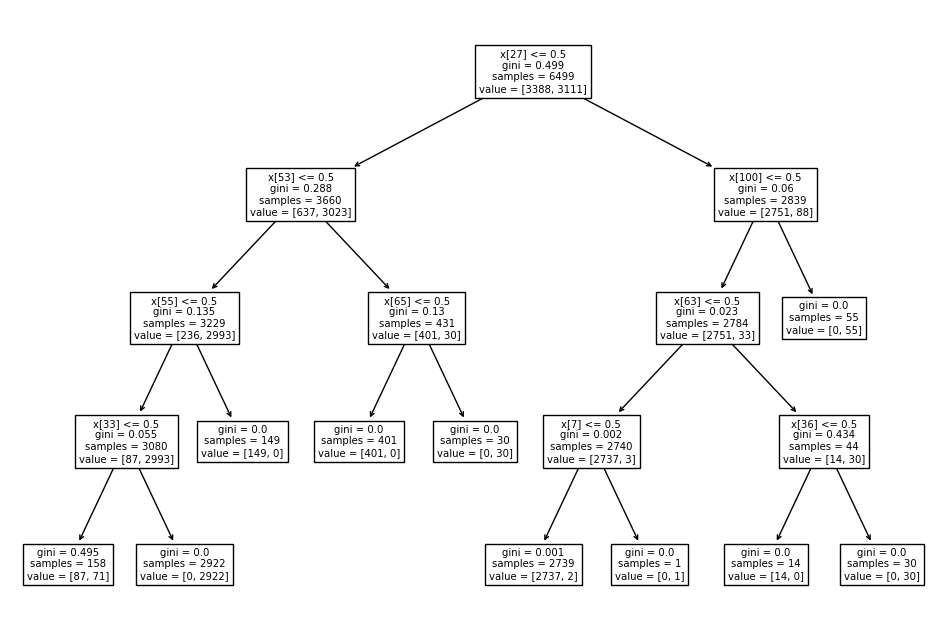

In [112]:
plt.figure(figsize=(12,8))

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [113]:
y_pred_gini = clf_gini.predict(X_test)

In [114]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([0, 0, 1, ..., 1, 0, 1])

In [115]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
#Accuracy Score for training set
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Model accuracy score with criterion gini index: 0.9834
Training-set accuracy score: 0.9888


In [116]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [117]:
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

[Text(0.5416666666666666, 0.9, 'x[27] <= 0.5\nentropy = 0.999\nsamples = 6499\nvalue = [3388, 3111]'),
 Text(0.3333333333333333, 0.7, 'x[20] <= 0.5\nentropy = 0.667\nsamples = 3660\nvalue = [637, 3023]'),
 Text(0.25, 0.5, 'x[53] <= 0.5\nentropy = 0.976\nsamples = 1077\nvalue = [637, 440]'),
 Text(0.16666666666666666, 0.3, 'x[63] <= 0.5\nentropy = 0.933\nsamples = 676\nvalue = [236, 440]'),
 Text(0.08333333333333333, 0.1, 'entropy = 0.646\nsamples = 527\nvalue = [87, 440]'),
 Text(0.25, 0.1, 'entropy = 0.0\nsamples = 149\nvalue = [149, 0]'),
 Text(0.3333333333333333, 0.3, 'entropy = 0.0\nsamples = 401\nvalue = [401, 0]'),
 Text(0.4166666666666667, 0.5, 'entropy = 0.0\nsamples = 2583\nvalue = [0, 2583]'),
 Text(0.75, 0.7, 'x[100] <= 0.5\nentropy = 0.199\nsamples = 2839\nvalue = [2751, 88]'),
 Text(0.6666666666666666, 0.5, 'x[63] <= 0.5\nentropy = 0.093\nsamples = 2784\nvalue = [2751, 33]'),
 Text(0.5, 0.3, 'x[35] <= 0.5\nentropy = 0.012\nsamples = 2740\nvalue = [2737, 3]'),
 Text(0.41666

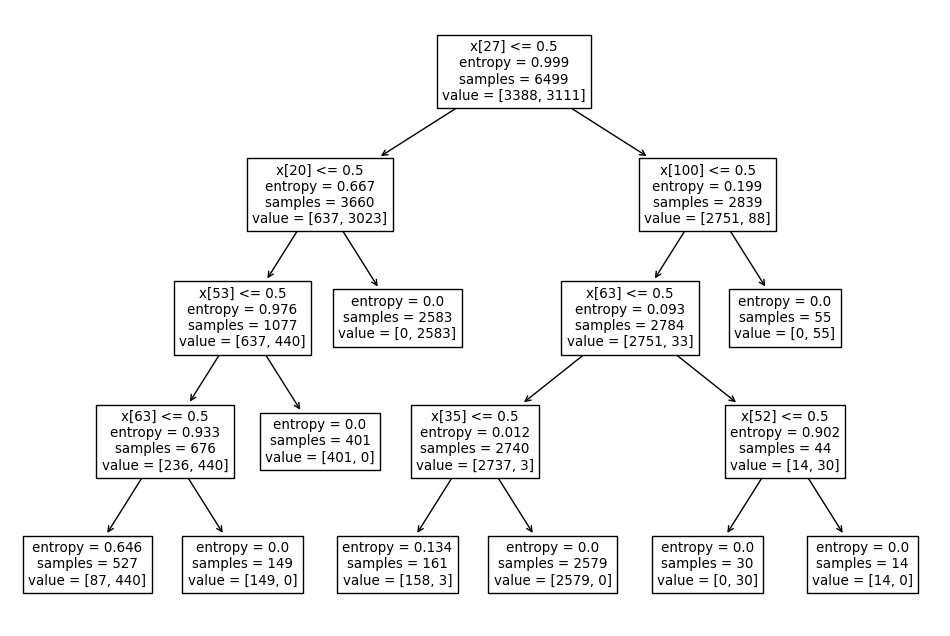

In [118]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [119]:
y_pred_en = clf_en.predict(X_test)

In [120]:
y_pred_train_en = clf_en.predict(X_train)

In [121]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Model accuracy score with criterion entropy: 0.9914
Training-set accuracy score: 0.9862


In [122]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.9862
Test set score: 0.9914


In [123]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import  f1_score

In [124]:
cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[811   9]
 [  5 800]]


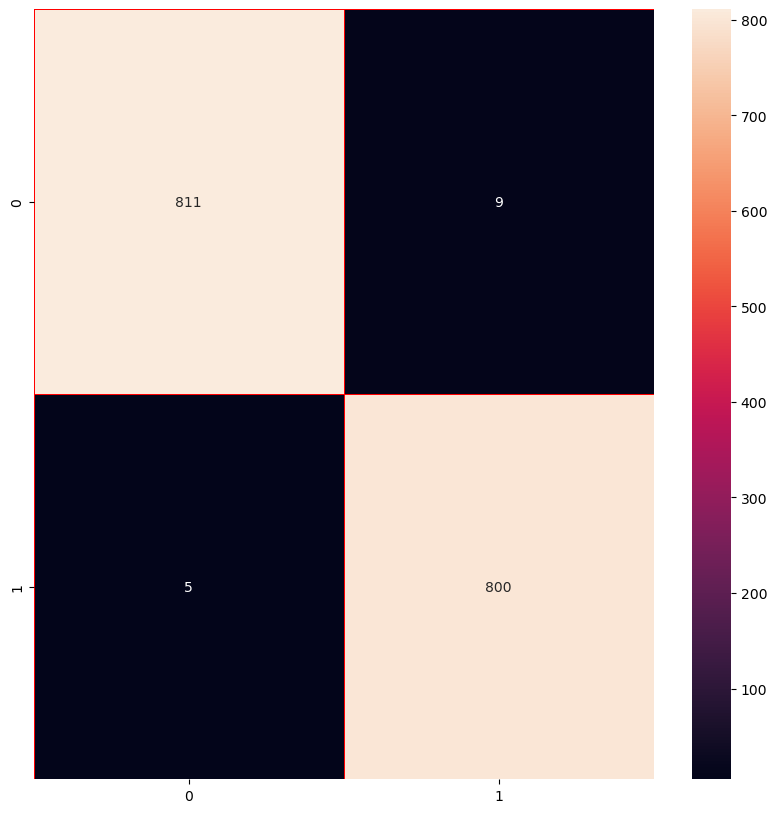

In [125]:
f,ax = plt.subplots(figsize=(10, 10))
sbn.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()


In [126]:
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       820
           1       0.99      0.99      0.99       805

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [127]:
f1_score = f1_score(y_test, y_pred_en)
print("F1 Score:",f1_score)

F1 Score: 0.9913258983890955
